In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)

print(x_data, t_data)
print(x_data.shape, t_data.shape)

[[1]
 [2]
 [3]
 [4]
 [5]] [[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]
(5, 1) (5, 1)


In [4]:
w = np.random.rand(1, 1)    # x와 t가 2차원 자료이기 때문에 얘도 2차원 자료여야 함
b = np.random.rand(1)

print(w, b)

[[0.64592896]] [0.55786245]


In [5]:
def loss_func(x, t):
    y = np.dot(x, w) + b
    return np.sum((y - t) ** 2) / (len(x))    # np.mean((y - t) ** 2)와 같은 식임

In [6]:
def numerical_derivative(f, x): 
    delta_x = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=[['readwrite']])
    while not it.finished: 
        idx = it.multi_index 
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x 
        fx1 = f(x) # f(x+delta_x)
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1-fx2) / (2*delta_x)
        x[idx] = tmp_val 
        it.iternext()
    return grad

In [7]:
def predict(x):
    return np.dot(x, w) + b

In [8]:
# Training Loof

learning_rate = 1e-2
cost_list = []

f = lambda x: loss_func(x_data, t_data)
print("Initial Loss:", loss_func(x_data, t_data), "Weight:", w, "Bias:", b)

# Gradient Descent
for step in range(5001):
    w -= learning_rate * numerical_derivative(f, w)
    b -= learning_rate * numerical_derivative(f, b)
    cost = loss_func(x_data, t_data)
    cost_list.append([step, cost])

    if step % 10 == 0:
        print("Step:", step, "Loss:", cost, "Weight:", w, "Bias:", b)

Initial Loss: 23.956191725520732 Weight: [[0.64592896]] Bias: [0.55786245]
Step: 0 Loss: 14.09511226586505 Weight: [[0.97035284]] Bias: [0.62848403]
Step: 10 Loss: 0.07317287853437648 Weight: [[1.96230532]] Bias: [0.84788392]
Step: 20 Loss: 0.0034679799033868032 Weight: [[2.03105132]] Bias: [0.86760816]
Step: 30 Loss: 0.0029275981109745906 Weight: [[2.03475762]] Bias: [0.87311268]
Step: 40 Loss: 0.002732262638145715 Weight: [[2.03391761]] Bias: [0.8774757]
Step: 50 Loss: 0.002550663493035764 Weight: [[2.03279435]] Bias: [0.88162383]
Step: 60 Loss: 0.002381088033359186 Weight: [[2.03168711]] Bias: [0.88562696]
Step: 70 Loss: 0.0022227828206611558 Weight: [[2.03061576]] Bias: [0.88949439]
Step: 80 Loss: 0.0020750021865130136 Weight: [[2.02958053]] Bias: [0.89323102]
Step: 90 Loss: 0.001937046658955981 Weight: [[2.0285803]] Bias: [0.89684131]
Step: 100 Loss: 0.001808263037487216 Weight: [[2.02761389]] Bias: [0.90032951]
Step: 110 Loss: 0.0016880415334715143 Weight: [[2.02668015]] Bias: [0

In [9]:
predicted = predict(np.array([[6], [7], [8]]))
print("6, 7, 8에 대한 예측값:", predicted.flatten())

6, 7, 8에 대한 예측값: [13.         15.         17.00000001]


Text(0.5, 0, 'Step')

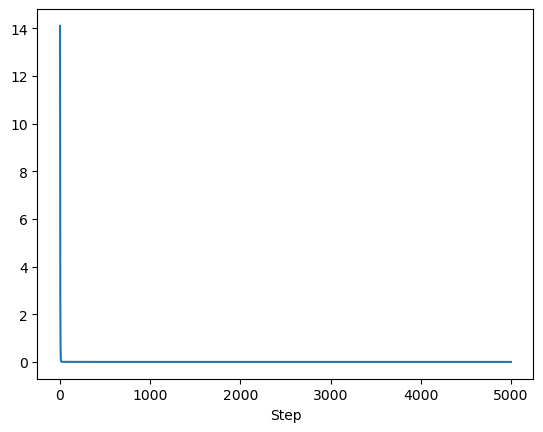

In [10]:
plt.plot(np.array(cost_list)[:, 0], np.array(cost_list)[:, 1])
plt.xlabel('Step')

In [11]:
# 다중선형회귀(다항모형)

x_data1 = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]] 
t_data1 = [[152.],[185.],[180.],[196.],[142.]]

x_data = np.array(x_data1)
t_data = np.array(t_data1)

print(x_data)
print(t_data)
print(x_data.shape, t_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]
(5, 3) (5, 1)


In [12]:
w = np.random.rand(3, 1)
b = np.random.rand(1)
print(w, b)

[[0.81421871]
 [0.37287863]
 [0.0252036 ]] [0.30379794]


In [13]:
# Training Loof

learning_rate = 1e-6
cost_list = []

f = lambda x: loss_func(x_data, t_data)
print("Initial Loss:", loss_func(x_data, t_data), "Weight:", w, "Bias:", b)

# # Gradient Descent
# step = 0
# while True:
#     step += 1
#     w -= learning_rate * numerical_derivative(f, w)
#     b -= learning_rate * numerical_derivative(f, b)
#     cost = loss_func(x_data, t_data)
#     cost_list.append([step, cost])

#     if step % 1000 == 0:
#         print("Step:", step, "Loss:", cost)
#         print("Weight:", w)
#         print("Bias:", b)

#     if cost < 0.15: break

Initial Loss: 4687.87832904448 Weight: [[0.81421871]
 [0.37287863]
 [0.0252036 ]] Bias: [0.30379794]


In [14]:
# plt.plot(np.array(cost_list)[:, 0], np.array(cost_list)[:, 1])
# plt.xlabel('Step')

In [15]:
#  실습
import pandas as pd

df = pd.read_csv('../data/data-01-test-score.csv', header=None)
df.values

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175],
       [ 76,  83,  71, 149],
       [ 96,  93,  95, 192]], dtype=int64)

In [16]:
x_data = df.values[:, :-1]
t_data = df.values[:, -1].reshape(-1, 1)    # 행은 그냥 알아서 맞춰달라는 뜻

In [17]:
w = np.random.rand(3, 1)
b = np.random.rand(1)

learning_rate = 1e-6
cost_list = []

f = lambda x: loss_func(x_data, t_data)
print("Initial Loss:", loss_func(x_data, t_data), "Weight:", w, "Bias:", b)

# Gradient Descent
step = 0
while True:
    step += 1
    w -= learning_rate * numerical_derivative(f, w)
    b -= learning_rate * numerical_derivative(f, b)
    cost = loss_func(x_data, t_data)
    cost_list.append([step, cost])

    if step % 100 == 0:
        print("Step:", step, "Loss:", cost)
        print("Weight:", w)
        print("Bias:", b)

    if step > 2 and cost_list[-2][1] - cost_list[-1][1] < 0.00001: break

Initial Loss: 35.560807110183546 Weight: [[0.7492305 ]
 [0.93851102]
 [0.30124831]] Bias: [0.65424223]
Step: 100 Loss: 26.185637577374877
Weight: [[0.76029201]
 [0.94847085]
 [0.31700056]]
Bias: [0.65439154]
Step: 200 Loss: 26.015541015325837
Weight: [[0.75943372]
 [0.94645317]
 [0.32047111]]
Bias: [0.65439881]
Step: 300 Loss: 25.849971865055323
Weight: [[0.7583597 ]
 [0.94422643]
 [0.32370303]]
Bias: [0.65440338]
Step: 400 Loss: 25.685821068065128
Weight: [[0.75728468]
 [0.9420065 ]
 [0.32691732]]
Bias: [0.65440781]
Step: 500 Loss: 25.52307527721621
Weight: [[0.75621258]
 [0.93979727]
 [0.33011807]]
Bias: [0.65441215]
Step: 600 Loss: 25.361722294898737
Weight: [[0.75514347]
 [0.93759878]
 [0.33330543]]
Bias: [0.65441639]
Step: 700 Loss: 25.201750030622396
Weight: [[0.75407733]
 [0.93541098]
 [0.33647945]]
Bias: [0.65442053]
Step: 800 Loss: 25.04314649972806
Weight: [[0.75301417]
 [0.93323381]
 [0.33964019]]
Bias: [0.65442458]
Step: 900 Loss: 24.885899822457453
Weight: [[0.75195398]
 [

Text(0, 0.5, 'Epoch')

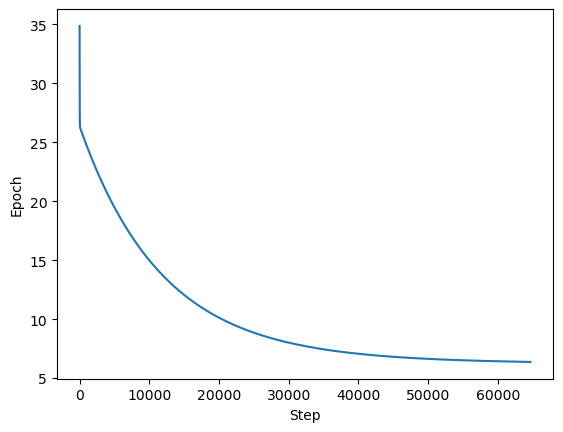

In [18]:
plt.plot(np.array(cost_list)[:, 0], np.array(cost_list)[:, 1])
plt.xlabel('Step')
plt.ylabel('Epoch')